Load Glutamatergic and GABAergic Data

In [1]:
import scanpy as sc
import numpy as np
import random
import matplotlib.pyplot as plt
import scanpy.external as sce
import nsforest as ns
sc.settings.verbosity = 3
sc.set_figure_params(dpi=100)
random.seed(66)

data_path = "G:/Shared drives/Opossum transcriptomics/Data/Opossum_M1/"

adata = sc.read_h5ad(data_path + "Opossum_M1_All_Clustered.h5ad")
adata

AnnData object with n_obs × n_vars = 115070 × 18827
    obs: 'batch', 'species', 'n_genes', 'n_counts', 'leiden', 'doublet', 'doublet_score', 'class'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'class_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [2]:
adata = adata[np.isin(adata.obs["class"], ["glutamatergic", "GABAergic"]), :]
del adata.uns
del adata.obsm
del adata.varm
del adata.obsp

In [3]:
adata.X = adata.raw.X

Analyze Glutamatergic Cells

In [4]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata, max_value=10)

extracting highly variable genes
    finished (0:00:04)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:19)


2023-05-15 12:17:43,194 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-05-15 12:18:16,867 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-05-15 12:18:17,570 - harmonypy - INFO - Iteration 1 of 10
2023-05-15 12:19:21,892 - harmonypy - INFO - Iteration 2 of 10
2023-05-15 12:20:24,766 - harmonypy - INFO - Iteration 3 of 10
2023-05-15 12:21:28,490 - harmonypy - INFO - Converged after 3 iterations


computing neighbors


c:\Users\TLab\anaconda3\envs\scanpy\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:42)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:27)


C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


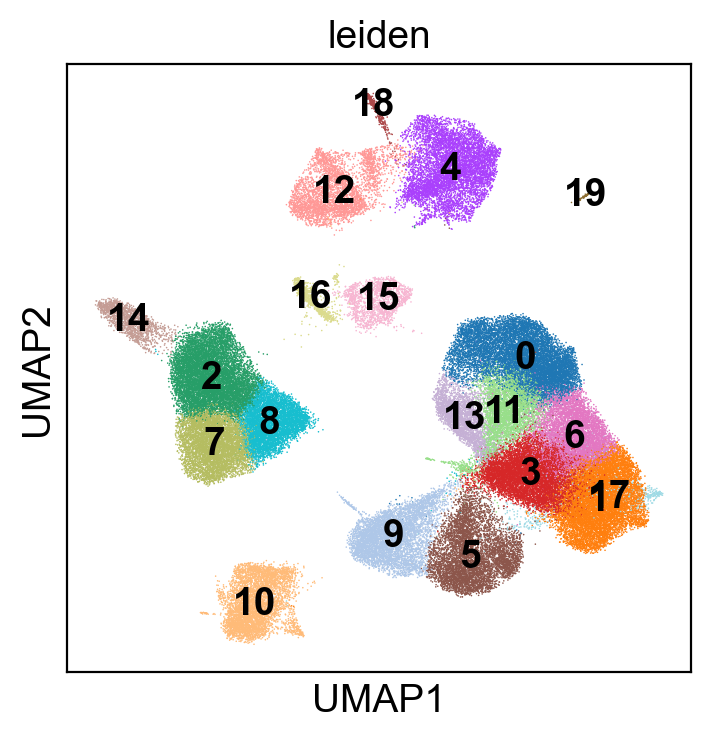

In [5]:
sc.tl.pca(adata, svd_solver="arpack")
sce.pp.harmony_integrate(adata, "batch")
sc.pp.neighbors(adata, n_neighbors=25, use_rep="X_pca_harmony")
sc.tl.leiden(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=["leiden"], legend_loc="on data")

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


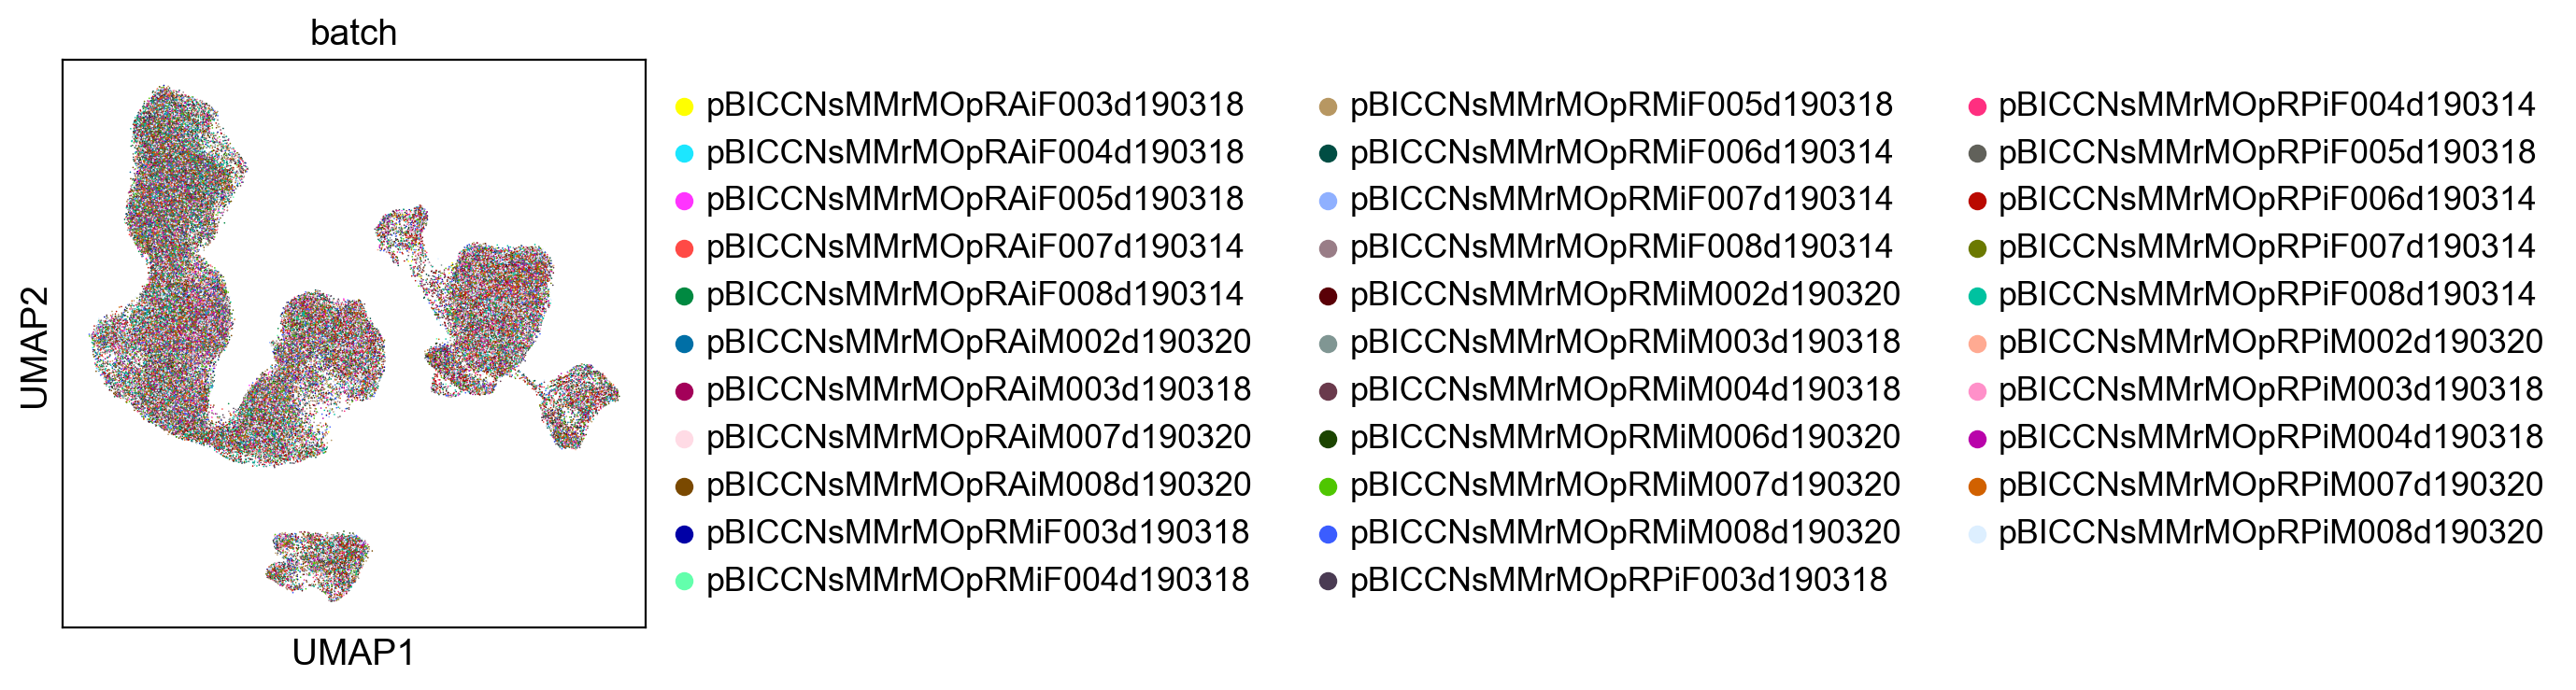

In [5]:
sc.pl.umap(adata, color=["batch"])

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


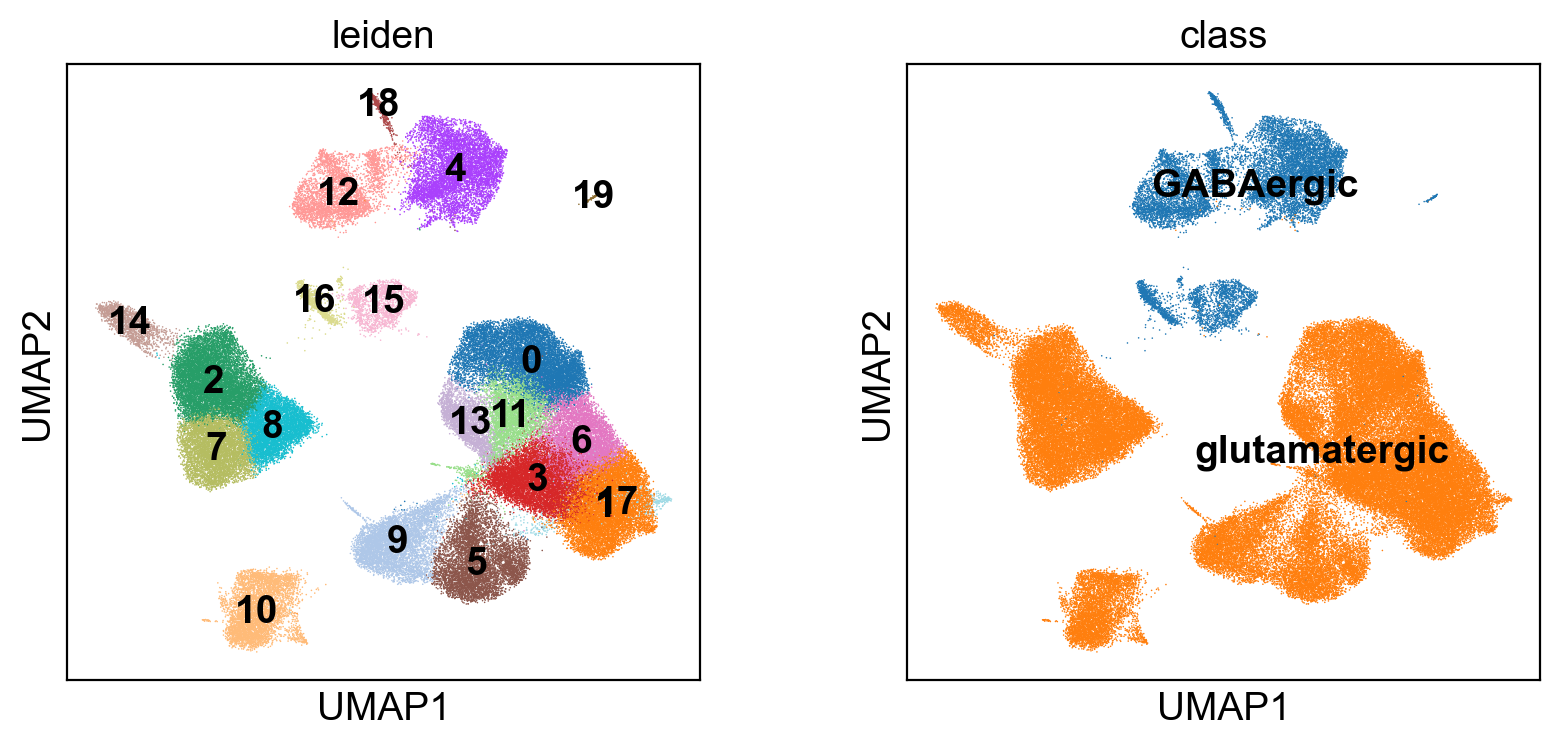

In [10]:
sc.pl.umap(adata, color=["leiden", "class"], legend_loc="on data")

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


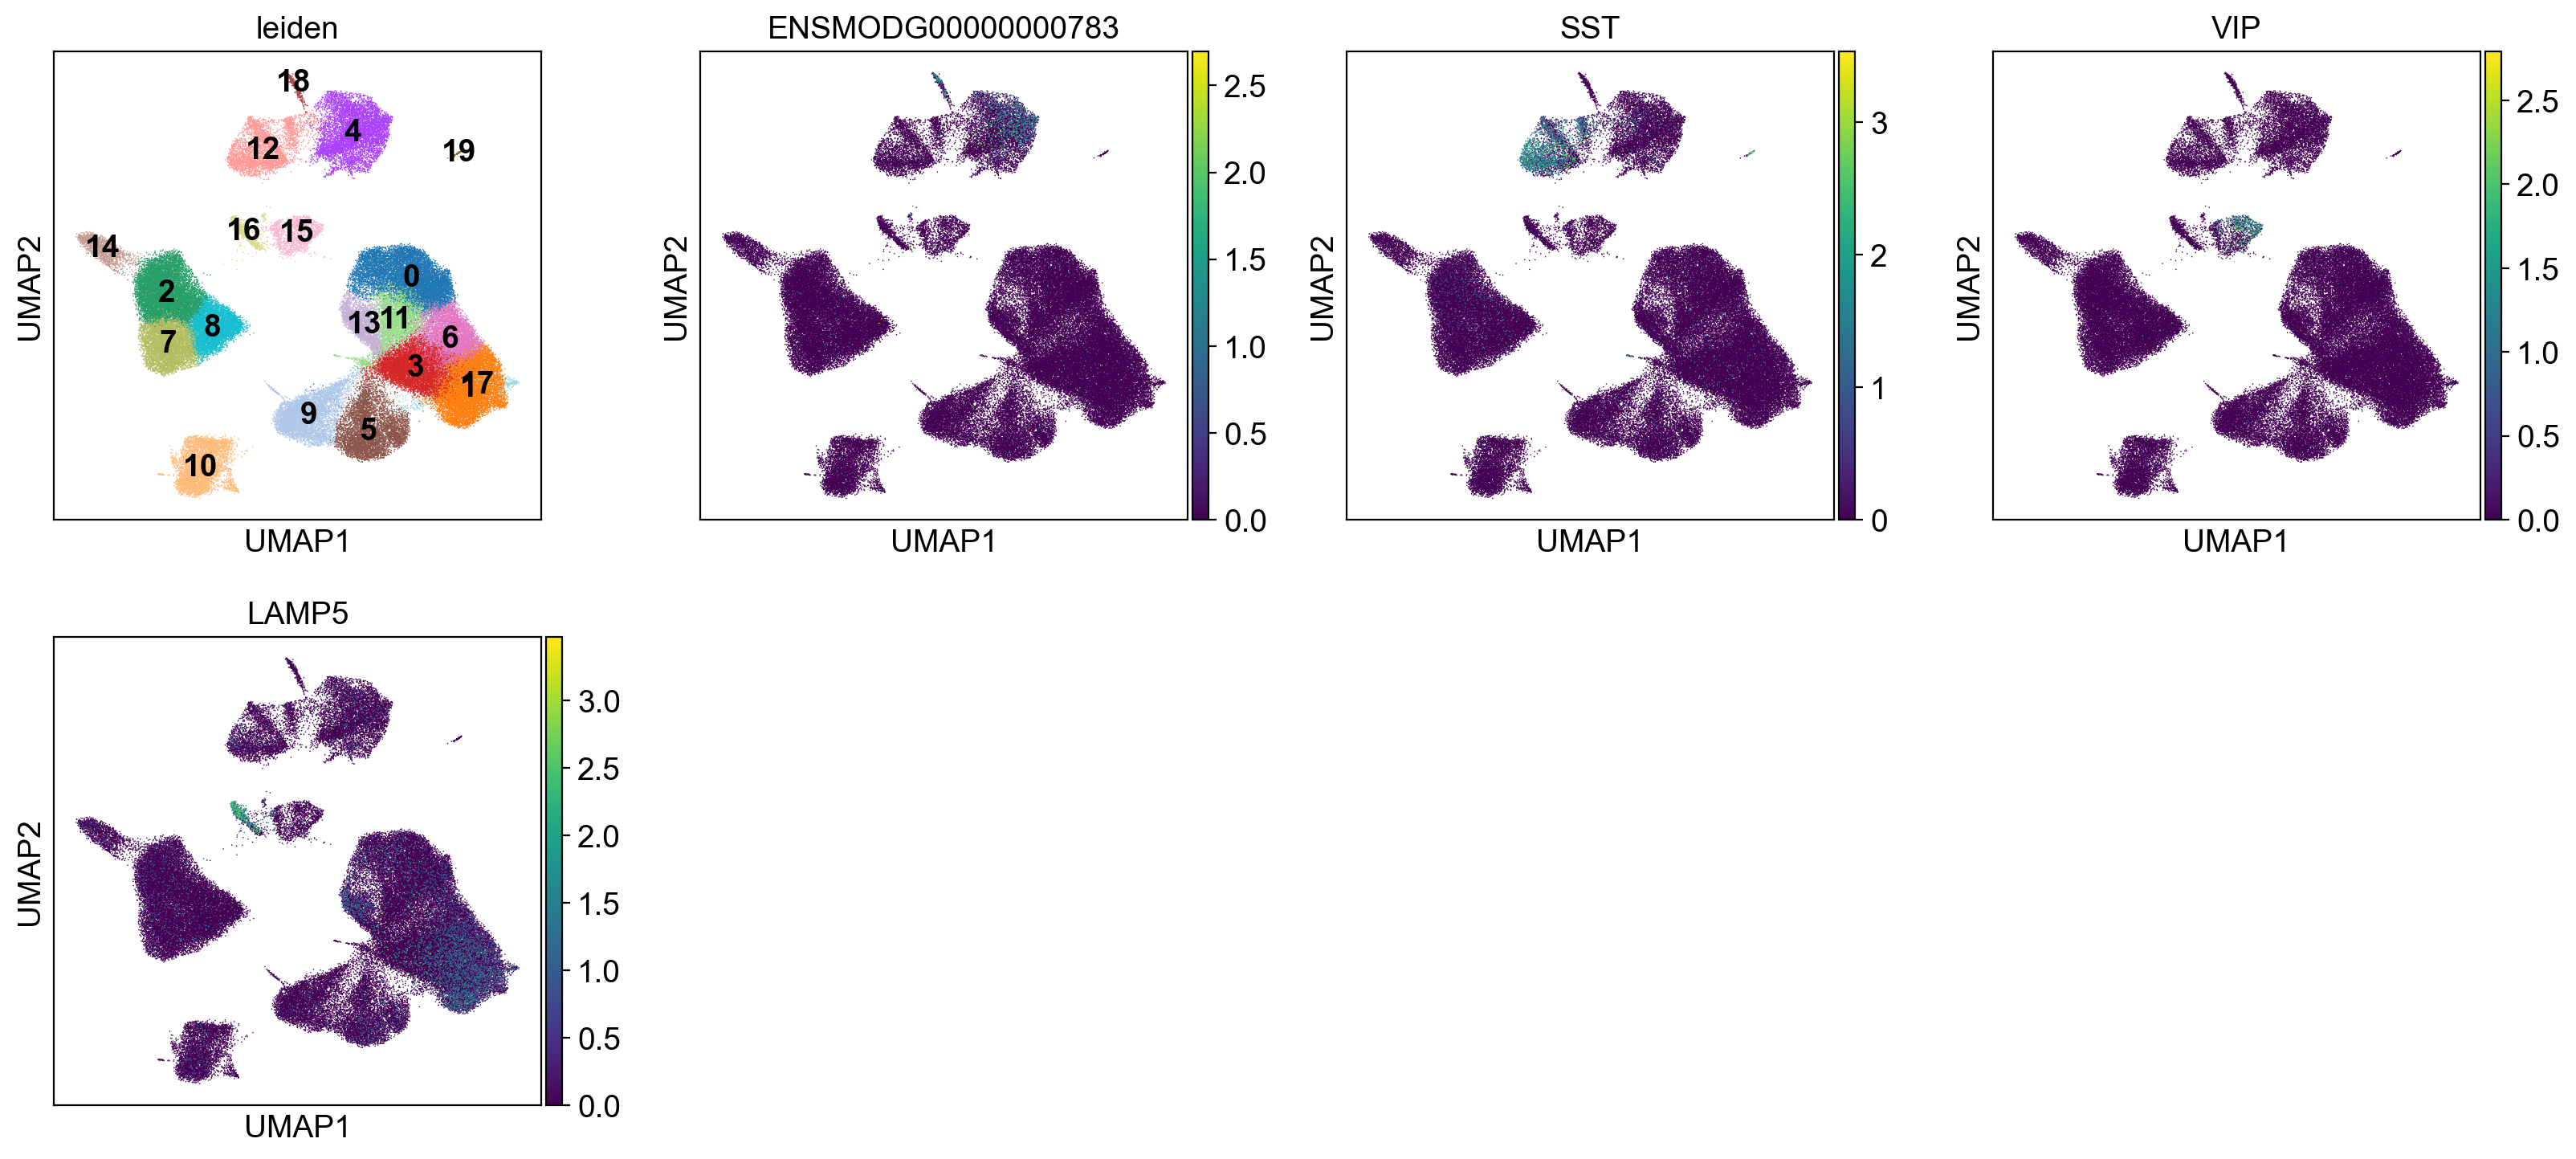

In [13]:
sc.pl.umap(adata, color=["leiden", "ENSMODG00000000783", "SST", "VIP", "LAMP5"], legend_loc="on data")

Label Subclasses via Marker Genes

In [2]:
subclass_idx = {
            "L23" : ["0", "4", "10", "18"], 
            "L45" : ["2", "5", "8", "14"], 
            "L5IT" : ["1"], 
            "L5ET" : ["11", "17"], 
            "L5NP" : ["12"], 
            "L6IT" : ["6", "7"], 
            "L6CT" : ["3", "9", "13", "15"], 
            "L6b" : ["16"], 
            "PV" : [], 
            "SST" : [], 
            "VIP" : [], 
            "Lamp5" : [], 
               }

adata.uns["subclass_idx"] = subclass_idx

adata.obs["subclass"] = [None] * adata.shape[0]

for name, idx in subclass_idx.items():
    mask = np.isin(adata.obs["leiden"], idx)
    adata.obs.loc[mask, "subclass"] = [name] * np.sum(mask)

C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Ryan\GitHub\scanpy\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


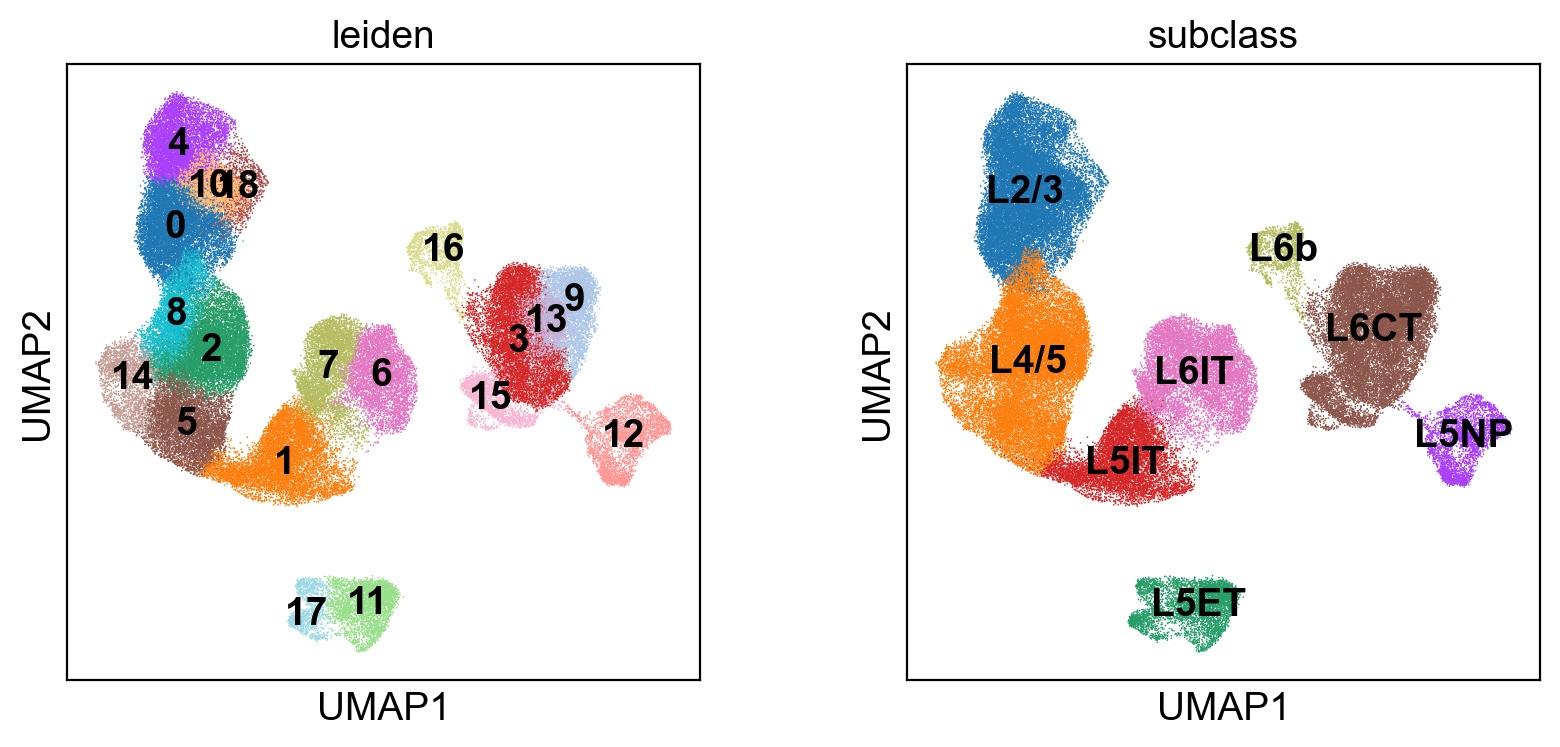

In [13]:
sc.pl.umap(adata, color=["leiden", "class", "subclass"], legend_loc="on data")